In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file = pd.read_csv("mall_customers.csv")

In [2]:
file.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
file.shape

(200, 5)

In [5]:
file.duplicated().sum()

0

# EDA 

In [6]:
gender_count = file["Gender"].value_counts()

<AxesSubplot:>

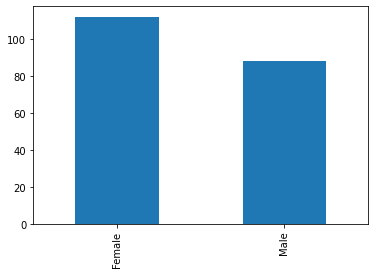

In [7]:
gender_count.plot(kind = 'bar')

From the plot above, females can be seen to populate the mall more

In [8]:
file2 = file.copy()

In [9]:
file2['age_group'] = pd.cut(file2['Age'], bins = [0,3,17,31,45,150], labels = ["Babies","Children","Young adults","Middle-Aged Adults","Old adults"])

<AxesSubplot:xlabel='age_group', ylabel='count'>

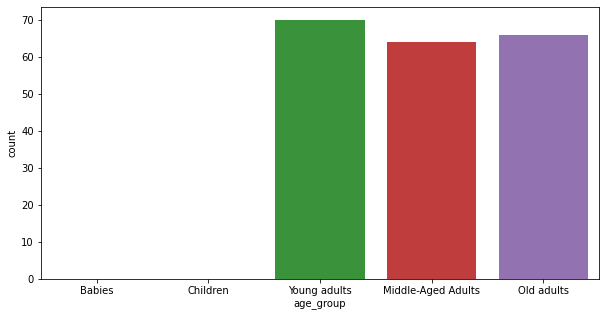

In [10]:
axes, fig = plt.subplots(1,1, figsize = (10,5))
sns.countplot(x = file2["age_group"])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

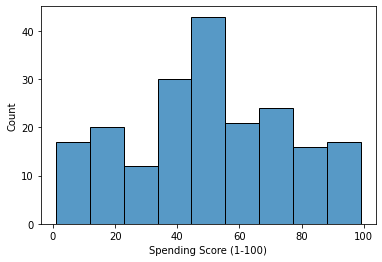

In [11]:
sns.histplot(data = file["Spending Score (1-100)"])


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

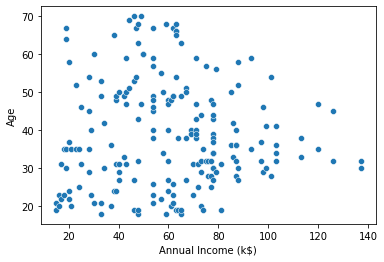

In [12]:
sns.scatterplot(data = file, x = file["Annual Income (k$)"], y = file["Age"])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

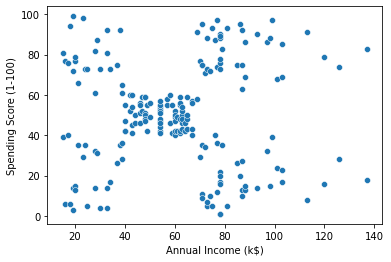

In [13]:
sns.scatterplot(data = file, x = file["Annual Income (k$)"], y = file["Spending Score (1-100)"])

The plot above shows a good pattern between the two features: "Spending Score (1-100)"  and  "Annual Income (k$)"

# MODEL BUILDING

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [15]:
le = LabelEncoder()
file["Gender"] = le.fit_transform(file["Gender"])

In [16]:
file.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = file[["Annual Income (k$)","Spending Score (1-100)"]]
x = ss.fit_transform(X)

C:\Users\user\anaconda3\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


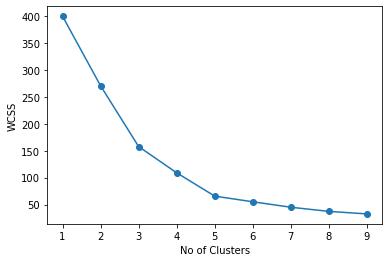

In [26]:
distance = []
for i in range(1,10):
    km = KMeans(n_clusters = i)
    km.fit(x)
    distance.append(km.inertia_)
plt.plot(range(1,10), distance, marker = "o")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

Using elbow method, point 5 would be selected as the no of clusters for this model

In [20]:
KM = KMeans(n_clusters = 5)
KM.fit(x)
label = KM.predict(x)

# Cluster Visualization

In [21]:
file["Label"] = label

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

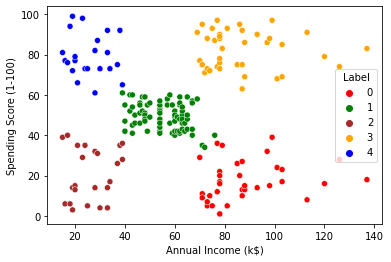

In [22]:
sns.scatterplot(data = file, x = file["Annual Income (k$)"] , y = file["Spending Score (1-100)"], hue = file["Label"], palette = ["red","green","brown","orange","blue"])

The five clusters are shown above with the different colors